https://www.kaggle.com/code/roblexnana/a-simple-reuters-news-classifier-in-keras-for-nlp

In [47]:
from tensorflow import keras
from tensorflow.keras.datasets import reuters 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical

ImportError: cannot import name 'np_utils' from 'keras.utils' (C:\Users\ITSC\anaconda3\Lib\site-packages\keras\utils\__init__.py)

In [25]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=1000, test_split = 0.2)

In [26]:
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(x_train), '학습용 뉴스 기사')
print(len(x_test), '테스트용 뉴스 기사')
print(x_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [27]:
# 훈련용 뉴스 기사 :8982 
# 테스트용 뉴스 기사 : 2246
# 카테고리 : 46
x_train.shape, x_test.shape

((8982,), (2246,))

In [28]:
np.unique(y_train, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64),
 array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
         390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
          15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
          11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
          12,   18], dtype=int64))

- 로이터 뉴스 카테고리 분류 데이터 
    - 총 11258개의 뉴스 기사 데이터
    - 46개의 카테고리 분류
    - 예) 
        - 중부 지방은 대체로 맑겠으나, 남부 지방은 구름이 많겠습니다 -> 날씨
        - 올 초부터 유동성의 힘으로 주가가 일정하게 상승했습니다 -> 주식 

In [29]:
# 단어장 만들기
word_index = reuters.get_word_index()

In [30]:
word_index

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [31]:
# 단어의 개수
len(word_index)

30979

In [32]:
idx2word = {0 : '<PAD>', 1 : '<S>', 2 : '<UNK>'}

In [33]:
idx2word.update({value + 3 : key for key, value in word_index.items()})

In [34]:
" ".join(map(lambda x : idx2word[x], x_train[0]))

'<S> <UNK> <UNK> said as a result of its december acquisition of <UNK> co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and <UNK> <UNK> revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash <UNK> per share this year should be 2 50 to three dlrs reuter 3'

- 많은 단어가 출력되므로 출력 결과는 중략했습니다. 이번에는 정수로부터 단어를 알 수 있도록 해보겠습니다. word_to_index에서 key와 value를 반대로 저장한 index_to_word를 만듭니다. 주의할 점은 reuters.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수입니다. 이것은 로이터 뉴스 데이터셋에서 정한 규칙입니다.

In [35]:
# index에 + 3을 했으므로 1등에 해당하는 단어를 알려면 숫자 4를 넣어야 함 
print('빈도수 상위 1번 단어 : {}'.format(idx2word[4]))

빈도수 상위 1번 단어 : the


# 데이터 준비

- 뉴스 기사의 최대 길이 : 2376
- 뉴스 기사의 평균 길이 : 146

In [36]:
# x_train, x_test, y_train, test = train_test_split(x_train, y_train, test_size = 0.2,
#                                                   random_state = 12)

In [37]:
# 패딩
x_train = pad_sequences(x_train, maxlen= 100,truncating='post')
x_test = pad_sequences(x_test, maxlen = 100, truncating='post')

In [38]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   2   8  43
  10 447   5  25 207 270   5   2 111  16 369 186  90  67   7  89   5  19
 102   6  19 124  15  90  67  84  22 482  26   7  48   4  49   8 864  39
 209 154   6 151   6  83  11  15  22 155  11  15   7  48   9   2   2 504
   6 258   6 272  11  15  22 134  44  11  15  16   8 197   2  90  67  52
  29 209  30  32 132   6 109  15  17  12]


In [39]:
x_train.shape

(8982, 100)

In [40]:
x_test.shape

(2246, 100)

In [41]:
# 훈련용, 테스트용 뉴스 기사 데이터의 레이블에 원핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 모델 구성

In [42]:
model = Sequential()
model.add(Embedding(1000, 100, input_shape = (100,)))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 100, 100)            │         100,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 46)                  │           4,646 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,046 (722.84 KB)

 Trainable params: 185,046 (722.84 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/best-lstm-model.keras',
                                                save_best_only= True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights= True)

In [45]:
history= model.fit(x_train, y_train, epochs= 200, batch_size = 20,
                   validation_data= (x_test, y_test),
                   callbacks= [checkpoint_cb, early_stopping_cb])

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.3923 - loss: 2.4393 - val_accuracy: 0.4550 - val_loss: 1.9995
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5482 - loss: 1.7935 - val_accuracy: 0.5793 - val_loss: 1.6843
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.5900 - loss: 1.6068 - val_accuracy: 0.6100 - val_loss: 1.5796
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.6400 - loss: 1.4195 - val_accuracy: 0.6705 - val_loss: 1.3502
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.6953 - loss: 1.1901 - val_accuracy: 0.7106 - val_loss: 1.2022
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7446 - loss: 1.0336 - val_accuracy: 0.7378 - val_loss: 1.0975
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7910 - loss: 0.8430 - val_accuracy: 0.7596 - val_loss: 1.0156
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8142 - loss: 0

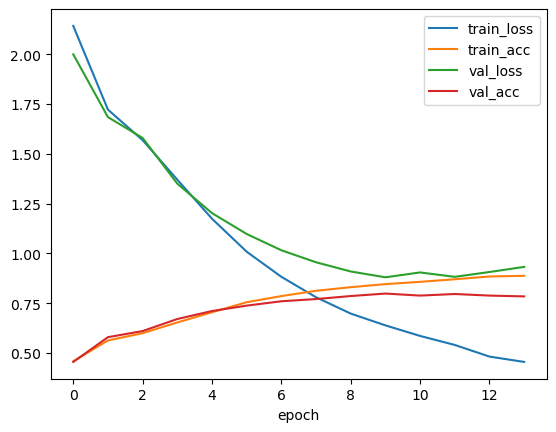

In [46]:
plt.figure()

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['accuracy'], label = 'train_acc')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.plot(history.history['val_accuracy'], label = 'val_acc')

plt.legend()
plt.xlabel('epoch')
plt.show()

In [24]:
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7208 - loss: 1.0757


[1.1195012331008911, 0.7230632305145264]